In [5]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018)
crime_2019_df = pd.read_csv(crime_2019)
crime_2020_df = pd.read_csv(crime_2020)
sa_postcodes_df = pd.read_csv(sa_postcodes)

crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])

In [6]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [7]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [8]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [9]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [10]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [11]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [12]:
#review updated dataframe
crime_postcode_merge_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227842,2020-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,15588.0,SA,138.565224,...,403041084.0,Morphett Vale - East,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
227843,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227844,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227845,2020-12-31,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13720.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0


In [13]:
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4','state'])

In [14]:
crime_postcode_merge_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,138.603897,-35.061705,SOMERTON PARK DC,Onkaparinga,Adelaide - South,R2,-35.067000,138.600000,Aberfoyle Park,Onkaparinga,Adelaide - South
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227842,2020-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,138.565224,-35.112119,LONSDALE DC,Onkaparinga,Adelaide - South,R2,-35.118261,138.543736,Morphett Vale - East,Onkaparinga,Adelaide - South
227843,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0,138.527677,-34.883282,REGENCY PARK DC,Charles Sturt,Adelaide - West,R2,-34.881000,138.535000,Beverley,Charles Sturt,Adelaide - West
227844,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,138.527677,-34.883282,REGENCY PARK DC,Charles Sturt,Adelaide - West,R2,-34.881000,138.535000,Beverley,Charles Sturt,Adelaide - West
227845,2020-12-31,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,138.527677,-34.883282,REGENCY PARK DC,Charles Sturt,Adelaide - West,R2,-34.881000,138.535000,Beverley,Charles Sturt,Adelaide - West


In [16]:
crimes_2019_df = crime_postcode_merge_df.loc[(crime_postcode_merge_df["Reported Date"] >= "2019-01-01") & (crime_postcode_merge_df["Reported Date"] <= "2019-12-31")]
crimes_2020_df = crime_postcode_merge_df.loc[(crime_postcode_merge_df["Reported Date"] >= "2020-01-01") & (crime_postcode_merge_df["Reported Date"] <= "2020-12-31")]

In [79]:
total_2019_l1 = crimes_2019_df.groupby(["Offence Level 1 Description"])
total_2019_new_l1 = total_2019_l1.sum()['Offence count']
total_2020_l1 = crimes_2020_df.groupby(["Offence Level 1 Description"])
total_2020_new_l1 = total_2020_l1.sum()['Offence count']
frames_2019_2020 = [total_2019_new_l1, total_2020_new_l1]
result_2019_2020 = pd.merge(total_2019_new_l1, total_2020_new_l1, on= "Offence Level 1 Description")
result_l1_new = result_2019_2020.rename(columns = {"Offence count_x":"Offence 2019","Offence count_y":"Offence 2020"})
result_l1_new


,Offence 2019,Offence 2020
Offence Level 1 Description,,
OFFENCES AGAINST PROPERTY,96932.0,79969.0
OFFENCES AGAINST THE PERSON,18968.0,19862.0


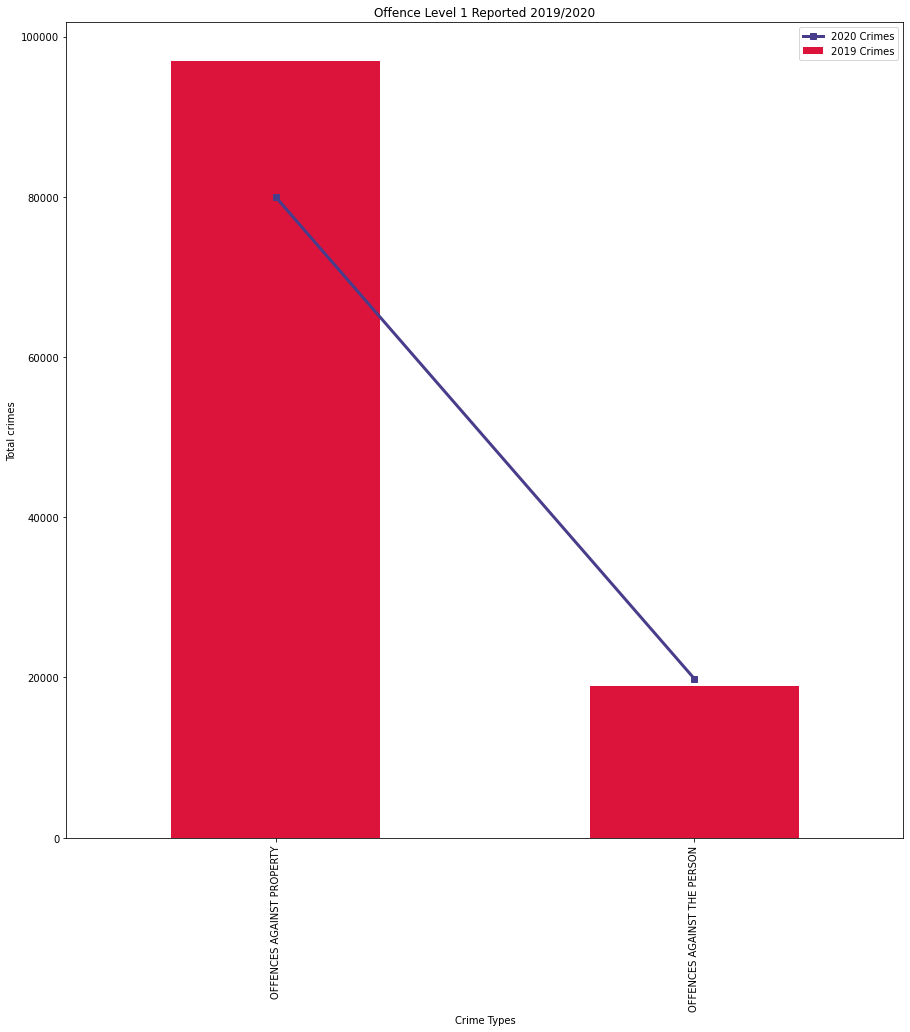

In [80]:
total_2019_new_l1.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
total_2020_new_l1.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Total crimes")
plt.xlabel("Crime Types")
plt.title("Offence Level 1 Reported 2019/2020")
plt.show()

In [77]:
total_2019_l2 = crimes_2019_df.groupby(["Offence Level 2 Description"])
total_2019_new_l2 = total_2019_l2.sum()['Offence count']
total_2020_l2 = crimes_2020_df.groupby(["Offence Level 2 Description"])
total_2020_new_l2 = total_2020_l2.sum()['Offence count']
frames_2019_2020 = [total_2019_new_l2, total_2020_new_l2]
result_2019_2020 = pd.merge(total_2019_new_l2, total_2020_new_l2, on= "Offence Level 2 Description")
result_l2_new = result_2019_2020.rename(columns = {"Offence count_x":"Offence 2019","Offence count_y":"Offence 2020"})
result_l2_new

,Offence 2019,Offence 2020
Offence Level 2 Description,,
ACTS INTENDED TO CAUSE INJURY,16471.0,17919.0
FRAUD DECEPTION AND RELATED OFFENCES,3910.0,2868.0
HOMICIDE AND RELATED OFFENCES,38.0,35.0
OTHER OFFENCES AGAINST THE PERSON,1801.0,1402.0
PROPERTY DAMAGE AND ENVIRONMENTAL,21847.0,20328.0
ROBBERY AND RELATED OFFENCES,658.0,506.0
SERIOUS CRIMINAL TRESPASS,16432.0,12571.0
THEFT AND RELATED OFFENCES,54743.0,44202.0


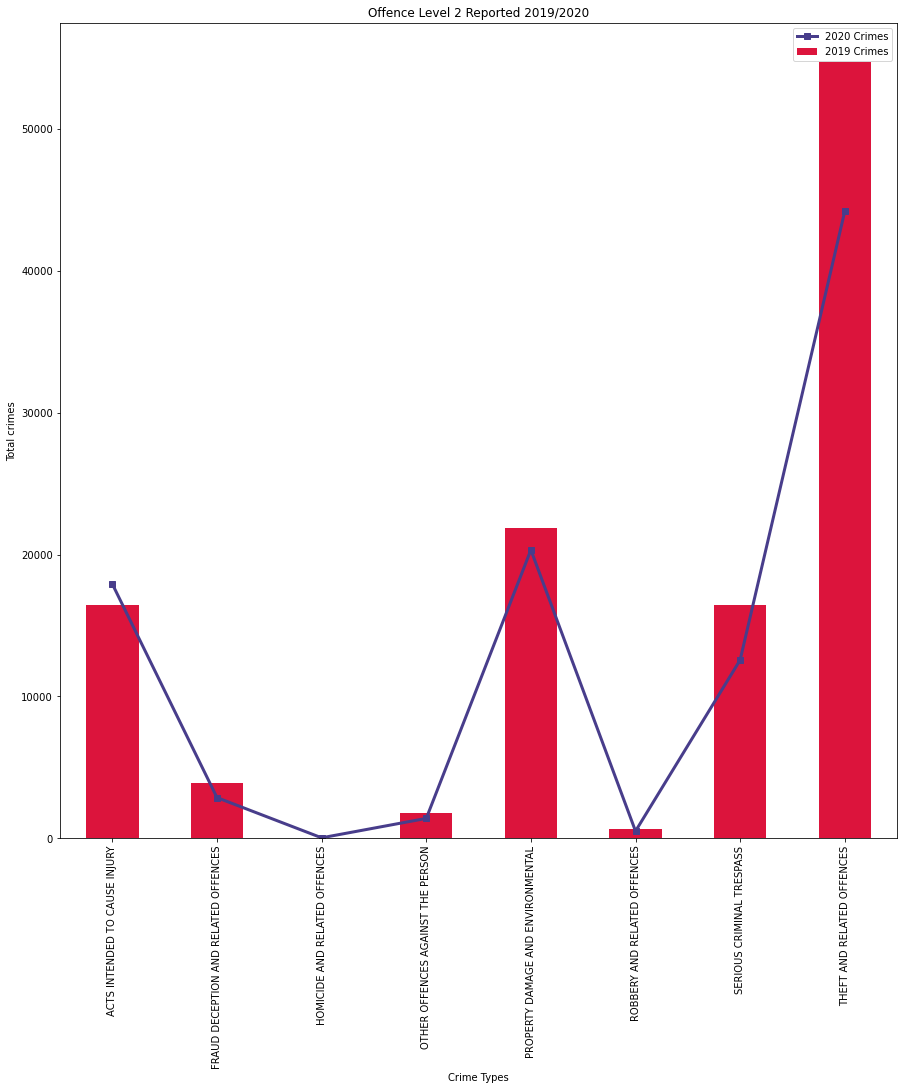

In [78]:
total_2019_new_l2.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
total_2020_new_l2.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Total crimes")
plt.xlabel("Crime Types")
plt.title("Offence Level 2 Reported 2019/2020")
plt.show()

In [75]:
total_2019_l3 = crimes_2019_df.groupby(["Offence Level 3 Description"])
total_2019_new_l3 = total_2019_l3.sum()['Offence count']
total_2020_l3 = crimes_2020_df.groupby(["Offence Level 3 Description"])
total_2020_new_l3 = total_2020_l3.sum()['Offence count']
frames_2019_2020 = [total_2019_new_l3, total_2020_new_l3]
result_2019_2020 = pd.merge(total_2019_new_l3, total_2020_new_l3, on= "Offence Level 3 Description")
result_l3_new = result_2019_2020.rename(columns = {"Offence count_x":"Offence 2019","Offence count_y":"Offence 2020"})
result_l3_new

,Offence 2019,Offence 2020
Offence Level 3 Description,,
"Abduction, harassment and other offences",471.0,437.0
Aggravated robbery,482.0,359.0
Assault police,619.0,497.0
Blackmail and extortion,61.0,52.0
Common Assault,5573.0,2292.0
Dangerous or negligent acts,597.0,272.0
Graffiti,1704.0,1671.0
Murder,13.0,8.0
Non-aggravated robbery,115.0,95.0


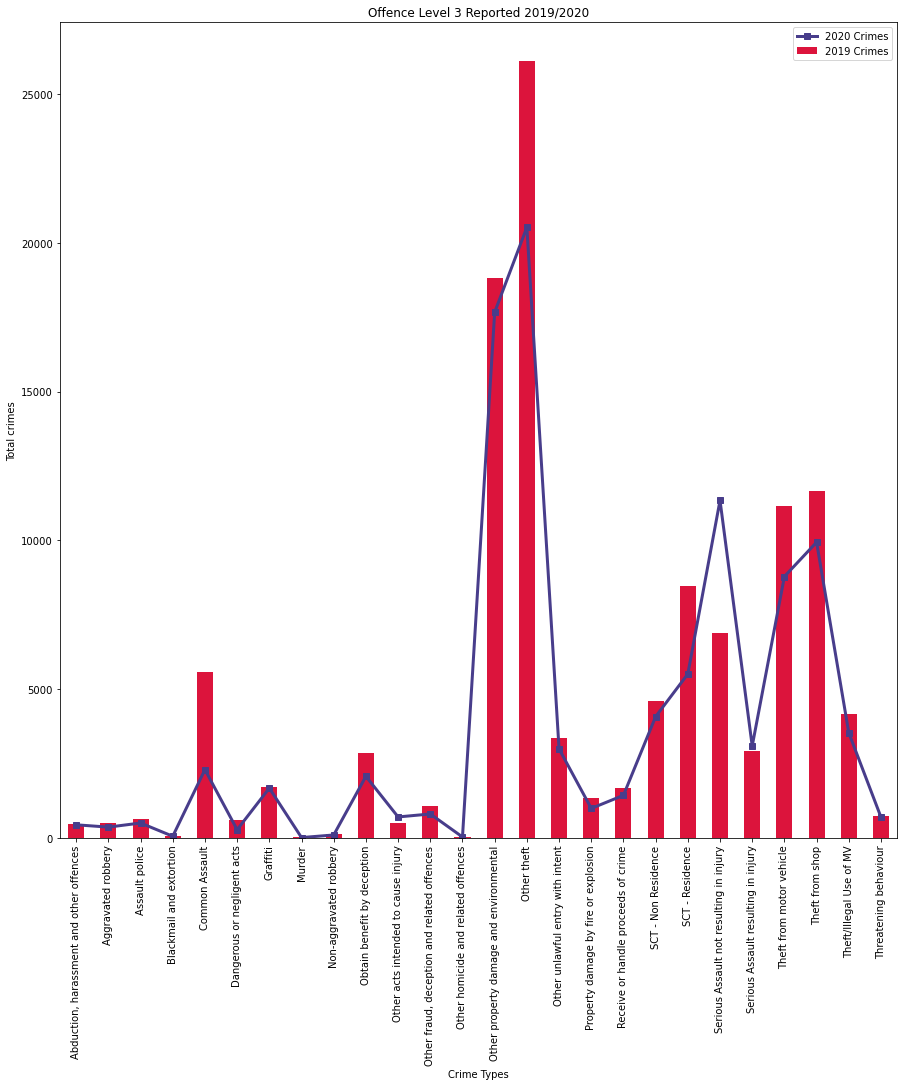

In [76]:
total_2019_new_l3.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
total_2020_new_l3.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("Total crimes")
plt.xlabel("Crime Types")
plt.title("Offence Level 3 Reported 2019/2020")
plt.show()